<a href="https://colab.research.google.com/github/Doobong/lectures-bigphys/blob/master/Fitting_%EA%B3%BC%EC%A0%9C_2015103459_%EC%9D%B4%EB%91%90%EB%B4%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import random

In [2]:
def f(x, A, k):
    return A * sin(k * x)

In [3]:
x_list = [(random.uniform(-3 * pi, 3 * pi)) for i in range(1000)]
y_list = [(f(x_list[i], 3, 0.5) + random.gauss(-0.5, 0.5)) for i in range(1000)]

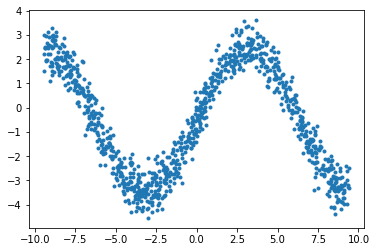

In [4]:
plt.plot(x_list,y_list, '.')
plt.show()

In [5]:
bestK = 0
bestA = 0
bestLoss = 1e9

dt = 0.001
lossHistory = []
kHistory = []
AHistory = []

k = 0.9
A = 5

for i in range(10000):
    kGrad = [-2 * (y_list[i] - f(x_list[i], A, k)) * A * x_list[i] * cos(k*x_list[i]) for i in range(len(y_list))]
    AGrad = [-2 * (y_list[i] - f(x_list[i], A ,k)) * sin(k * x_list[i]) for i in range(len(y_list))]

    k -= sum(kGrad) / len(kGrad) * dt
    A -= sum(AGrad) / len(AGrad) * dt

    reses = [(y_list[i] - f(x_list[i], A, k)) ** 2 for i in range(len(y_list))]
    loss = sqrt(sum(reses) / len(reses))

    kHistory.append(k)
    AHistory.append(A)
    lossHistory.append(loss)

    if loss < bestLoss:
        bestK = k
        bestA = A
        bestLoss = loss

print(bestK, bestA, bestLoss)

0.49557950717610216 2.9879073408935697 0.7032189449617691


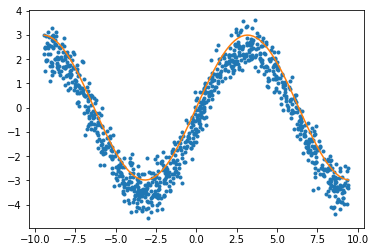

In [6]:
plt.plot(x_list, y_list, '.')
x_Plot = np.linspace(-3 * pi, 3 * pi, 100)
y_Plot = np.zeros([100], float)
for i in range(len(y_Plot)):
    y_Plot[i] = f(x_Plot[i], bestA, bestK)

plt.plot(x_Plot, y_Plot, '-')
plt.show()